# Generación de números aletorios

* ref.: https://numpy.org/doc/stable/reference/random/
* ref.: https://numpy.org/doc/stable/reference/random/generator.html

**NOTA**: la generación de números aleatorios ha cambiado no hace mucho. Veréis muchos ejemplos de uso con la manera antigua, así que os recomendamos acudir siempre a la documentación oficial de Numpy.

**Random Generator**

*The Generator provides access to a wide range of distributions, and served as a replacement for RandomState. The main difference between the two is that Generator relies on an additional BitGenerator to manage state and generate the random bits, which are then transformed into random values from useful distributions. The default BitGenerator used by Generator is PCG64. The BitGenerator can be changed by passing an instantized BitGenerator to Generator.*

In [5]:
# Primero importamos la librería numpy
import numpy as np

# Creamos el generador por defecto
rng = np.random.default_rng()

## Distribución uniforme

In [6]:
# Generamos 10 números aleatorios entre 0 y 1
rng.uniform(low=0.0, high=1.0, size=10)

array([0.65538755, 0.13706172, 0.76201895, 0.69577447, 0.08935641,
       0.98932785, 0.80157374, 0.66360381, 0.59958407, 0.11066059])

In [10]:
# Generamos 10 números aleatorios entre 0 y 1 en una matriz de 10x5
rng.uniform(low=0.0, high=1.0, size=(10,5))

array([[0.21462988, 0.5028729 , 0.93456005, 0.21349244, 0.89015482],
       [0.9994073 , 0.79662724, 0.06811504, 0.76702589, 0.03861889],
       [0.4952128 , 0.239426  , 0.0726349 , 0.98535019, 0.33122928],
       [0.63278276, 0.9319861 , 0.13766028, 0.39861496, 0.11507837],
       [0.01974264, 0.65955328, 0.86495174, 0.82686253, 0.26368588],
       [0.44472428, 0.6445883 , 0.41563494, 0.65497978, 0.62793468],
       [0.04185616, 0.58102225, 0.86818062, 0.97346478, 0.26775632],
       [0.02548137, 0.83055954, 0.05656028, 0.4652883 , 0.73077921],
       [0.60005723, 0.85185838, 0.23097908, 0.45408167, 0.10389599],
       [0.14003847, 0.07465114, 0.51089607, 0.64911109, 0.67782518]])

- Podemos observar en el siguiente histograma que la distribución es uniforme

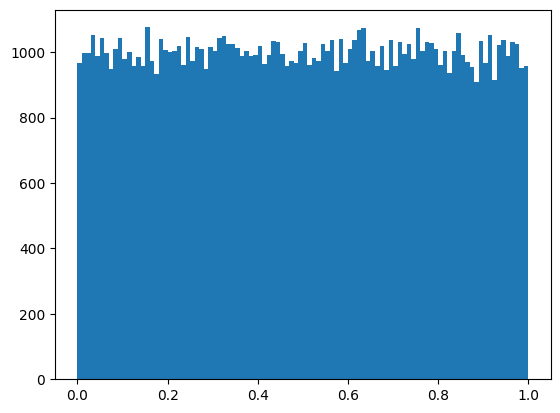

In [14]:
import matplotlib.pyplot as plt

# Generamos 100000 números aleatorios entre 0 y 1 y los representamos en un histograma
aleatorios_uniforme = rng.uniform(low=0.0, high=1.0, size=100000)
plt.hist(aleatorios_uniforme, bins=100);

## Distribución normal

In [15]:
# Generamos 10 números aleatorios siguiendo una distribución normal con media 0 y desviación típica 1
rng.normal(loc=0.0, scale=1.0, size=10)

array([ 0.13067465,  1.65880858,  1.28100102, -0.45365853,  1.10976375,
       -0.20717252, -0.54181367, -0.37710224, -0.15116362, -1.60958671])

In [16]:
# Generamos 10 números aleatorios siguiendo una distribución normal con media 0 y desviación típica 1
# en una matriz de 10x5
rng.normal(loc=0.0, scale=1.0, size=(10,5))

array([[ 0.49435103,  1.43935033, -0.40348782,  0.45577118, -0.06280781],
       [-2.54356962, -0.68475532, -0.39205795,  0.61796075, -0.0670649 ],
       [ 0.15966275, -0.96303823, -2.09175535, -0.61803218,  0.07585156],
       [-0.3244895 , -0.15291586, -1.51277577, -1.37413493,  0.16429852],
       [-0.3725404 , -0.67177746,  1.26776379,  0.15804205,  1.3628488 ],
       [ 1.78238971,  0.22268536,  0.06429122, -1.34414653, -0.91506384],
       [-0.09058119, -0.34920052,  0.94856385,  0.41886284,  0.73042338],
       [ 0.50927323,  0.24227856, -0.51194579, -0.45008008, -0.91159477],
       [-0.51773976,  0.21258624, -1.947031  , -0.23658241, -1.21601509],
       [ 0.84484962, -0.22680926,  0.9412797 , -0.80136576, -0.72616146]])

* Podemos observar en el siguiente histograma que la distribución es normal

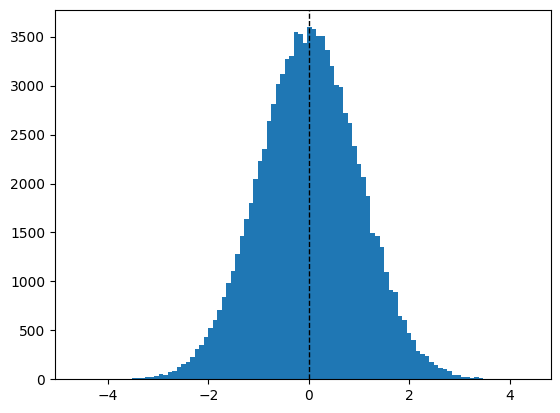

In [35]:
import matplotlib.pyplot as plt

# Generamos 100000 números aleatorios siguiendo una distribución normal con media 0 y desviación típica 1
aleatorios_normal = rng.normal(loc=0.0, scale=1.0, size=100000)
plt.hist(aleatorios_normal, bins=100);

# Dibuja una línea vertical en la media
mu = np.mean(aleatorios_normal)
plt.axvline(mu, color='black', linestyle='--', linewidth=1);

## Selección aleatoria de elementos y permutaciones

ref.: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html

**random.Generator.choice(a, size=None, replace=True, p=None, axis=0, shuffle=True)**
- a: indica el array del que se van a extraer los elementos
- size: indica las dimensiones de salida
- replace: indica si la selección es con remplazo o sin
- p: indica la probabilidad de cada elemento del array, en cado de no tener, se asume uniforme
- axis: indica el eje en el que se hace la selección
- shuffle: indica si se aleatorizan las posiciones del array cuando se selecciona sin reemplazo


In [40]:
# Selección de elementos con reemplazo y distribución uniforme
mi_array = np.array(['azul','rojo','verde','naraja','amarillo'])
rng.choice(mi_array, size=10)

array(['naraja', 'rojo', 'amarillo', 'azul', 'naraja', 'rojo', 'azul',
       'amarillo', 'naraja', 'naraja'], dtype='<U8')

In [41]:
# Selección de elementos de "mi_array" con una determinada probabilidad "prob"
mi_array = np.array(['azul','rojo','verde','naraja','amarillo'])
prob = np.array([0.1, 0.2, 0.3, 0.2, 0.2])
np.random.choice(mi_array, 10, p=prob)

array(['amarillo', 'rojo', 'naraja', 'amarillo', 'verde', 'verde',
       'amarillo', 'amarillo', 'azul', 'verde'], dtype='<U8')

In [44]:
# Selección de elementos sin reemplazo y distribución uniforme
mi_array = np.array(['azul','rojo','verde','naraja','amarillo'])
rng.choice(mi_array, size=4, replace=False)

array(['naraja', 'amarillo', 'azul', 'verde'], dtype='<U8')

In [45]:
# Selección de elementos sin reemplazo y distribución uniforme
# Error si se selecciónan más elementos de los que hay en el array
mi_array = np.array(['azul','rojo','verde','naraja','amarillo'])
rng.choice(mi_array, size=10, replace=False)

ValueError: Cannot take a larger sample than population when replace is False

- Vamos a mostrar las diferencias al cambiar el vectore de probabilidades

In [50]:
# Selección de elementos de "mi_array" con una determinada probabilidad "prob"
mi_array = np.array(['azul','rojo','verde','naraja','amarillo'])
prob = np.array([0.05, 0.05, 0.8, 0.05, 0.05])
np.random.choice(mi_array, 10, p=prob)

array(['verde', 'verde', 'verde', 'verde', 'naraja', 'verde', 'azul',
       'verde', 'verde', 'verde'], dtype='<U8')

**random.shuffle(x)** y **random.permutation(x)**

* ref: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html
* ref.: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html

In [57]:
# Reordena aleatoriamente los elementos de "mi_array" sin devolver una copia
mi_array = np.arange(10)
print(mi_array)

rng.shuffle(mi_array)
print(mi_array)

[0 1 2 3 4 5 6 7 8 9]
[6 0 4 5 7 2 1 3 9 8]


In [61]:
# Reordena aleatoriamente los elementos de "mi_array" devolviendo una copia
mi_array = np.arange(10)
print(mi_array)

nuevo_array = rng.permutation(mi_array)
print(mi_array)
print(nuevo_array)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[1 8 4 9 5 0 6 3 2 7]


___
# Ejercicio

**1.-** Lanza una moneda 30,50,100 veces y muestra su media

**2.-** Crea una distribución normal con media 314, desviación 77  y muestra estos parámetros por pantalla (media y std del array)

**3.-** Crea una función que pida 2 números y devuelve un array de 100 elementos con una distribución entre ambos